In [2]:
import pandas as pd

## Leitura de dados

In [11]:
# CSV
df_csv = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')

# Excel
excel_file = pd.ExcelFile('https://pycourse.s3.amazonaws.com/temperature.xlsx')
df_excel = pd.read_excel(excel_file, sheet_name = 'Sheet1')

In [19]:
# 3 primeiras linhas do df
print(df_csv.head(3), '\n')

# 3 ultimas linhas do df
print(df_csv.tail(3), '\n')

# describe do df
print(df_csv.describe(), '\n')

# infos do df
print(df_csv.info(), '\n')

# colunas do df
print(df_csv.columns, '\n')

         date  temperatura classification
0  2020-01-01         29.1         quente
1  2020-02-01         31.2   muito quente
2  2020-03-01         28.5         quente 

         date  temperatura classification
3  2020-04-01         28.0         quente
4  2020-05-01         24.0    confortavel
5  2020-06-01         20.0           frio 

       temperatura
count     6.000000
mean     26.800000
std       4.075782
min      20.000000
25%      25.000000
50%      28.250000
75%      28.950000
max      31.200000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6 non-null      object 
 1   temperatura     6 non-null      float64
 2   classification  6 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes
None 

Index(['date', 'temperatura', 'classification'], dtype='object') 



## Indexação

In [20]:
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [23]:
df['date']

0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
Name: date, dtype: object

In [27]:
df[['date', 'temperatura']]

,date,temperatura
0,2020-01-01,29.1
1,2020-02-01,31.2
2,2020-03-01,28.5
3,2020-04-01,28.0
4,2020-05-01,24.0
5,2020-06-01,20.0


In [31]:
df.iloc[0:2]

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente


In [41]:
df.loc[:,'temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [43]:
# Converte a coluna Date para datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6 non-null      datetime64[ns]
 1   temperatura     6 non-null      float64       
 2   classification  6 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 272.0+ bytes


In [48]:
# setando um index no df
df = df.set_index('date')

In [47]:
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [49]:
# filtros
# seleção dos registros acima de 25 graus
df[df['temperatura'] > 25]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [50]:
# Registros até 2020-03-01
df[df.index <= '2020-03-01']

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [51]:
# Colouna classification onde a date é menor igual 2020-03-01
df.loc[df.index <= '2020-03-01', ['classification']]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


## Ordenação

In [53]:
df.sort_values(by = ['temperatura'])

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [55]:
df.sort_values(by = ['classification', 'temperatura'])

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente


In [56]:
df.sort_values(by = ['classification', 'temperatura'], ascending = False)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-02-01,31.2,muito quente
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel


In [57]:
df.sort_index()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


## Visualização da Dados no Pandas

<AxesSubplot:xlabel='date'>

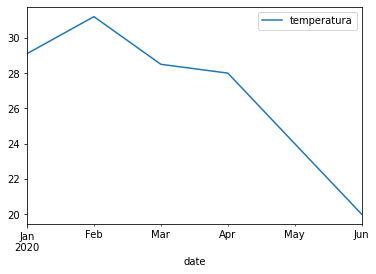

In [58]:
df.plot()

<AxesSubplot:xlabel='date'>

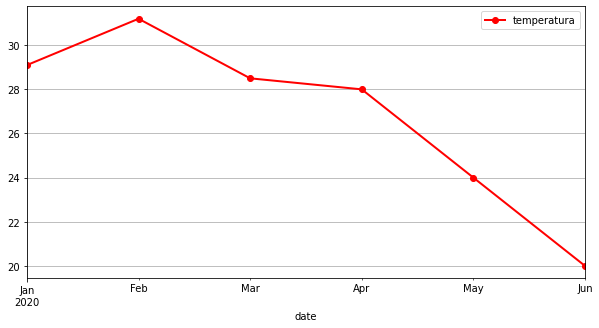

In [71]:
df.plot(
    figsize = (10,5), 
    grid = True,
    style = '-o',
    linewidth = 2,
    color = 'Red',
    legend = True
)

<AxesSubplot:>

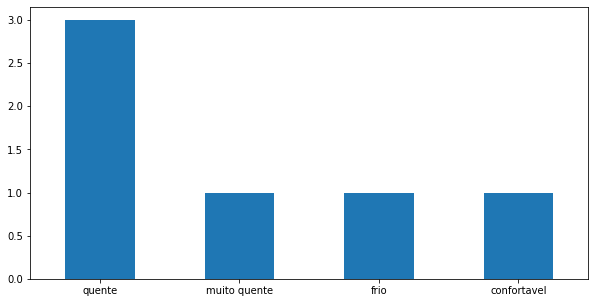

In [76]:
df['classification'].value_counts().plot.bar(figsize = (10,5), rot = 0)

<AxesSubplot:ylabel='classification'>

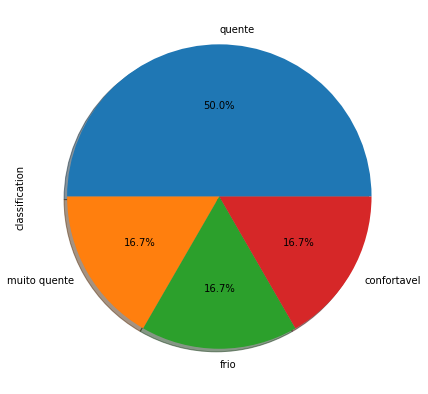

In [77]:
df['classification'].value_counts().plot.pie(figsize = (10,7), shadow = True, autopct = '%1.1f%%')

In [80]:
df.groupby(by = ['classification']).mean()

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333
